In [1]:
import pandas as pd

In [2]:
import sqlite3

Create SQLite connection

In [31]:
con = sqlite3.connect("/Users/francescaepiccorelli/Downloads/Data Engineering/new_db.db")

In [32]:
df = pd.read_csv("df_no_nan.csv")

/var/folders/ny/g82ykkn10bd8fqbx1q14fk_m0000gn/T/ipykernel_5016/1704895601.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_no_nan.csv")


Create SQLite database

In [33]:
df.to_sql("Main Table",con)

10683528

In [6]:
sql_df = pd.read_sql("SELECT * FROM Main Table",con=con)

In [11]:
sql_df.head()

,index,Unnamed: 0,date,hour,lat,long,signal,network,operator,status,...,satellites,precission,provider,activity,postal_code,town_name,position_geom,latitude,longitude,Cleaned_Network
0,0,0,2017-12-18,15:30:21,41.93341,3.15735,18,yoigo,Yoigo,0,...,2.0,128.0,gps,STILL,170139.0,Begur,POINT(3.15735 41.93341),"<regex.Match object; span=(0, 8), match='41.93...","<regex.Match object; span=(0, 7), match='3.157...",Yoigo
1,1,1,2017-12-18,01:10:15,42.19660,3.03423,10,yoigo,Yoigo,0,...,6.0,32.0,gps,STILL,171984.0,Torroella de Fluvià,POINT(3.03423 42.1966),"<regex.Match object; span=(0, 7), match='42.19...","<regex.Match object; span=(0, 7), match='3.034...",Yoigo
2,2,2,2017-12-18,08:20:42,42.19691,3.03393,15,yoigo,Yoigo,0,...,2.0,64.0,gps,STILL,171984.0,Torroella de Fluvià,POINT(3.03393 42.19691),"<regex.Match object; span=(0, 8), match='42.19...","<regex.Match object; span=(0, 7), match='3.033...",Yoigo
3,3,3,2017-12-18,00:24:31,42.19674,3.03404,7,yoigo,Yoigo,0,...,8.0,48.0,gps,STILL,171984.0,Torroella de Fluvià,POINT(3.03404 42.19674),"<regex.Match object; span=(0, 8), match='42.19...","<regex.Match object; span=(0, 7), match='3.034...",Yoigo
4,4,4,2017-12-18,01:16:25,42.19689,3.03424,8,yoigo,Yoigo,0,...,6.0,32.0,gps,STILL,171984.0,Torroella de Fluvià,POINT(3.03424 42.19689),"<regex.Match object; span=(0, 8), match='42.19...","<regex.Match object; span=(0, 7), match='3.034...",Yoigo


Create smaller, more workable subsets

In [8]:
import numpy as np

In [9]:
smaller_dfs = np.array_split(sql_df,50)

In [10]:
df_0 = smaller_dfs[0]

In [13]:
import matplotlib.pyplot as plt

In [ ]:
#MAKE DATABASE FILTERABLE BY TIME
st.slider(label, min_value=None, max_value=None, value=None, step=None, format=None, key=None, help=None, on_change=None, args=None, kwargs=None, *, disabled=False, label_visibility="visible")

In [ ]:
new_df = df[0]

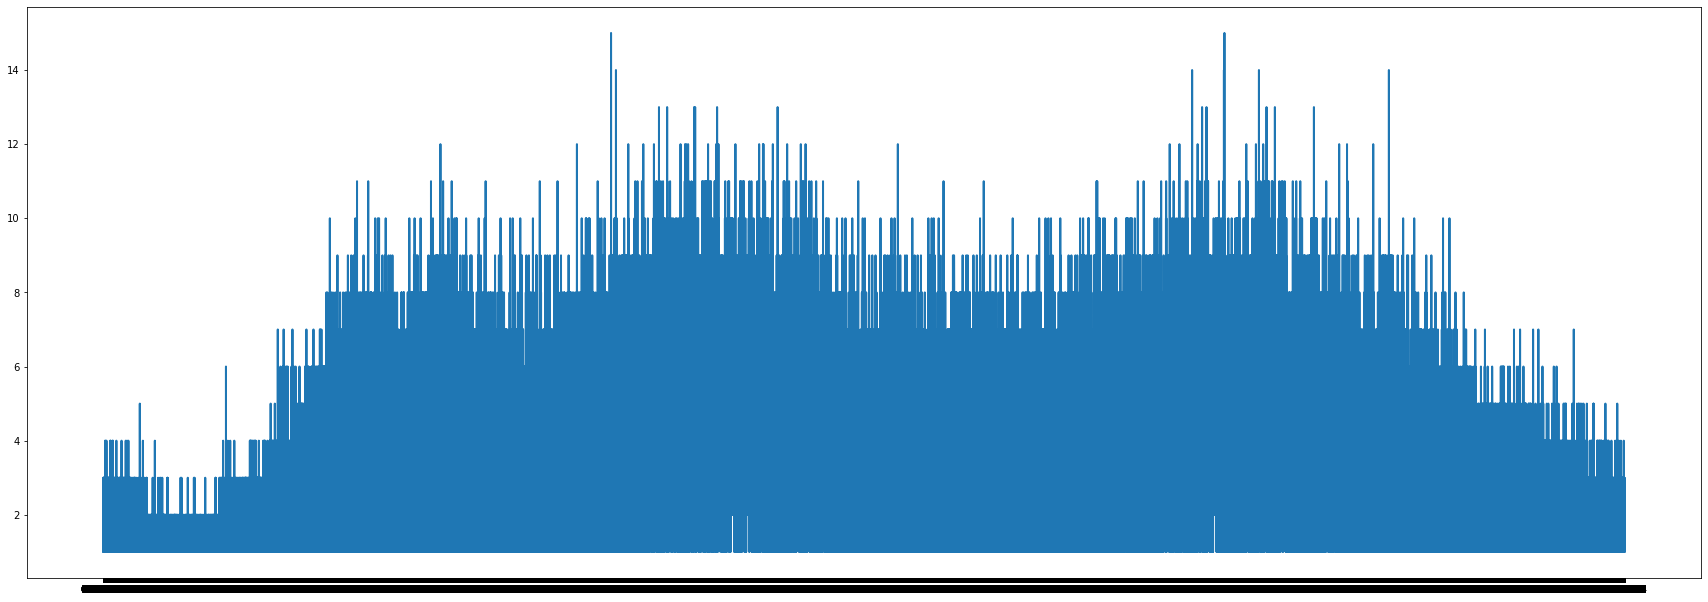

In [14]:
fig, ax = plt.subplots()
ax.plot(np.unique(df_0["hour"]), df_0["hour"].value_counts().sort_index(), linewidth=2.0)
fig.set_size_inches(30, 10.5, forward=True)

In [19]:
df_0["Cleaned_Network"].unique()

array(['Yoigo', 'Orange', 'MoviStar', 'VodaFone', 'Jazztel',
       'Eroski Movil', 'Other', 'Lowi', 'Mobiland', None, 'Simyo',
       'CableMovil', 'Parlem'], dtype=object)

In [20]:
df_0["Cleaned_Network"].value_counts()

MoviStar        90816
Orange          57150
VodaFone        53660
Yoigo            9754
Jazztel          1006
Other             558
Eroski Movil      239
Simyo             216
Lowi              109
Mobiland          105
Parlem             35
CableMovil         22
Name: Cleaned_Network, dtype: int64

In [23]:
df_0["Cleaned_Network"].value_counts().index.values

array(['MoviStar', 'Orange', 'VodaFone', 'Yoigo', 'Jazztel', 'Other',
       'Eroski Movil', 'Simyo', 'Lowi', 'Mobiland', 'Parlem',
       'CableMovil'], dtype=object)

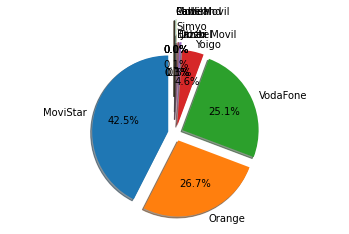

In [27]:
fig1, ax1 = plt.subplots()
ax1.pie(df_0["Cleaned_Network"].value_counts(),explode = (0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.3,0.5,0.5,.5,.5),labels=df_0["Cleaned_Network"].value_counts().index.values, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
### signal, speed, and precision
"Top_Networks"

In [ ]:
metric_input = button

In [ ]:
fig2, ax2 = plt.subplots()
ax2.plot(df_0["Top_Networks"].unique(), df_0["speed"], linewidth=2.0)
fig2.set_size_inches(30, 10.5, forward=True)

In [ ]:
fig3, ax3 = plt.subplots()
ax3.plot(df_0["activity"].unique(), df_0[""], linewidth=2.0)
fig3.set_size_inches(30, 10.5, forward=True)

In [ ]:
fig4, ax4 = plt.subplots()
ax4.pie(df_0["activity"].value_counts(),labels=df_0["activity"].value_counts().index.values, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
metric by area

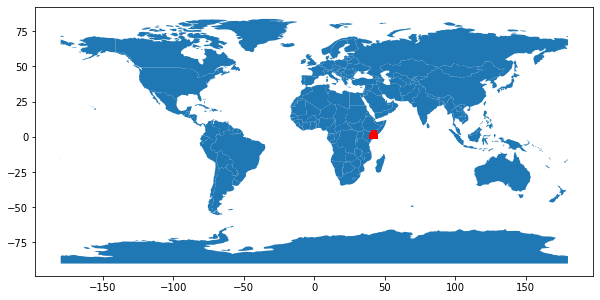

In [34]:
import shapely.geometry
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df_0['lat'], df_0['long'])]
gdf = GeoDataFrame(df_0, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world = gpd.read_file(df)
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [35]:
df_0["date"][0].type()

AttributeError: 'str' object has no attribute 'type'

In [36]:
type(df_0["date"][0])

str

In [39]:
pd.to_datetime(df_0["date"],inplace=True)

TypeError: to_datetime() got an unexpected keyword argument 'inplace'

In [38]:
type(df_0["date"][0])

str

In [40]:
df_0.to_csv("df_no_nan_small.csv")